In [3]:
# Packages

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt

#Encoding packages

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [4]:
# reading the 2000 to 2012
df_1= pd.read_csv(r"ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df_1.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0


In [5]:
# reading the 1990 to 1999
df_2= pd.read_csv(r"C:\Users\Shiva Periaswamy\Documents\project\guvi\guvi_project_5_singapore\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df_2.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000


In [7]:
# reading the 2015 to 2016
df_3= pd.read_csv(r"C:\Users\Shiva Periaswamy\Documents\project\guvi\guvi_project_5_singapore\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [8]:
# reading the 2017 to till date
df_4= pd.read_csv(r"C:\Users\Shiva Periaswamy\Documents\project\guvi\guvi_project_5_singapore\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df_4.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


In [9]:
# reading the 2012 to 2014
df_5= pd.read_csv(r"C:\Users\Shiva Periaswamy\Documents\project\guvi\guvi_project_5_singapore\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df_5.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0


In [10]:
#Merged all dataframe into one data frame for using
df_6= pd.concat([df_1,df_2,df_3,df_4,df_5],axis= 0)
df_6.reset_index(drop= True, inplace= True)
df_6.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
933659,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN
933660,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,545000.0,NaN


In [11]:
df_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933661 entries, 0 to 933660
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                933661 non-null  object 
 1   town                 933661 non-null  object 
 2   flat_type            933661 non-null  object 
 3   block                933661 non-null  object 
 4   street_name          933661 non-null  object 
 5   storey_range         933661 non-null  object 
 6   floor_area_sqm       933661 non-null  float64
 7   flat_model           933661 non-null  object 
 8   lease_commence_date  933661 non-null  int64  
 9   resale_price         933661 non-null  float64
 10  remaining_lease      224611 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.4+ MB


In [21]:
df_6.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [38]:
# Creating a new column "address"
df_6["address"]= df_6["block"]+" "+df_6["street_name"]

In [42]:
df_6

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,address
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN,170 ANG MO KIO AVE 4
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN,174 ANG MO KIO AVE 4
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN,216 ANG MO KIO AVE 1
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN,215 ANG MO KIO AVE 1
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN,218 ANG MO KIO AVE 1
...,...,...,...,...,...,...,...,...,...,...,...,...
933656,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN,816 YISHUN ST 81
933657,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN,325 YISHUN CTRL
933658,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN,618 YISHUN RING RD
933659,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN,277 YISHUN ST 22


In [43]:
df_7= df_6.drop(columns=["block","street_name"])

In [44]:
df_7.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,address
0,2000-01,ANG MO KIO,3 ROOM,07 TO 09,69.0,Improved,1986,147000.0,NaN,170 ANG MO KIO AVE 4
1,2000-01,ANG MO KIO,3 ROOM,04 TO 06,61.0,Improved,1986,144000.0,NaN,174 ANG MO KIO AVE 4


In [60]:
# for month
df_7["month"] = pd.to_datetime(df_7["month"], format="%Y-%m")
#spliting the month column to "Year", "month", "day"
df_7["year"]= df_7["month"].dt.year
df_7["month"]= df_7["month"].dt.month

In [61]:
df_7

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,address,storey_start,storey_end,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,69.0,Improved,1986,147000.0,NaN,1641,7,9,2000
1,1,ANG MO KIO,3 ROOM,04 TO 06,61.0,Improved,1986,144000.0,NaN,1696,4,6,2000
2,1,ANG MO KIO,3 ROOM,07 TO 09,73.0,New Generation,1976,159000.0,NaN,2375,7,9,2000
3,1,ANG MO KIO,3 ROOM,07 TO 09,73.0,New Generation,1976,167000.0,NaN,2359,7,9,2000
4,1,ANG MO KIO,3 ROOM,07 TO 09,67.0,New Generation,1976,163000.0,NaN,2417,7,9,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
933656,12,YISHUN,5 ROOM,10 TO 12,122.0,Improved,1988,580000.0,NaN,9067,10,12,2014
933657,12,YISHUN,EXECUTIVE,10 TO 12,146.0,Maisonette,1988,540000.0,NaN,4155,10,12,2014
933658,12,YISHUN,EXECUTIVE,07 TO 09,164.0,Apartment,1992,738000.0,NaN,7399,7,9,2014
933659,12,YISHUN,EXECUTIVE,07 TO 09,152.0,Maisonette,1985,592000.0,NaN,3380,7,9,2014


In [26]:
df_7["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN',
       'SENGKANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS',
       'YISHUN', 'SEMBAWANG', 'PUNGGOL', 'LIM CHU KANG'], dtype=object)

In [27]:
df_7["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '2 ROOM',
       'MULTI-GENERATION', '1 ROOM', 'MULTI GENERATION'], dtype=object)

In [28]:
df_7["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Apartment',
       'Simplified', 'Model A-Maisonette', 'Maisonette',
       'Multi Generation', 'Adjoined flat', 'Premium Apartment',
       'Terrace', 'Improved-Maisonette', 'Premium Maisonette', '2-room',
       'Model A2', 'IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD',
       'SIMPLIFIED', 'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE',
       'TERRACE', '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Type S1', 'Type S2', 'DBSS',
       'Premium Apartment Loft', '3Gen'], dtype=object)

In [29]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_7["town"]= LabelEncoder().fit_transform(df_7["town"])
df_7["flat_model"]= OrdinalEncoder().fit_transform(df_7[["flat_model"]])
df_7["flat_type"]= OrdinalEncoder().fit_transform(df_7[["flat_type"]])

In [30]:
df_7["town"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       19, 21, 22, 23, 24, 25, 26, 20, 18, 15])

In [31]:
df_7["flat_type"].unique()

array([2., 3., 4., 5., 1., 7., 0., 6.])

In [32]:
df_7["flat_model"].unique()

array([ 9., 21., 16., 29.,  5., 28., 17., 15., 19.,  4., 23., 31., 10.,
       25.,  1., 18.,  7., 20., 12., 27., 26., 13.,  3., 11., 30.,  0.,
        8., 14., 22., 32., 33.,  6., 24.,  2.])

In [33]:
df_7[["storey_start", "storey_end"]]= df_7["storey_range"].str.split(" TO ",expand=True)

In [34]:
#droping the "storey_range" column
df_7.drop(columns=["storey_range"],inplace= True)

In [45]:
df_7["address"].nunique()

9841

In [46]:
df_7["address"]= LabelEncoder().fit_transform(df_7["address"])

In [49]:
df_7[["storey_start", "storey_end"]]= df_7["storey_range"].str.split(" TO ",expand=True)

In [50]:
df_7["storey_start"]= df_7["storey_start"].astype(int)
df_7["storey_end"]= df_7["storey_end"].astype(int)

In [76]:
df_8 = df_7.fillna(0)

In [77]:
slice_values= []
for i in df_8["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [78]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])

In [79]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [80]:
df_8.drop(columns=["remaining_lease"],inplace= True)

In [81]:
df_9= pd.concat([df_8,df_data],axis=1)

In [82]:
df_10= df_9[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [83]:
df_11=df_10.sort_values(by=["year","month"])

In [84]:
df_11.to_csv("ResaleFlatPrices.csv", index= False)

In [95]:
#df_11["town"] = df_11["town"].astype(float)
#df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_12= df_11[['year','month',  'floor_area_sqm', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

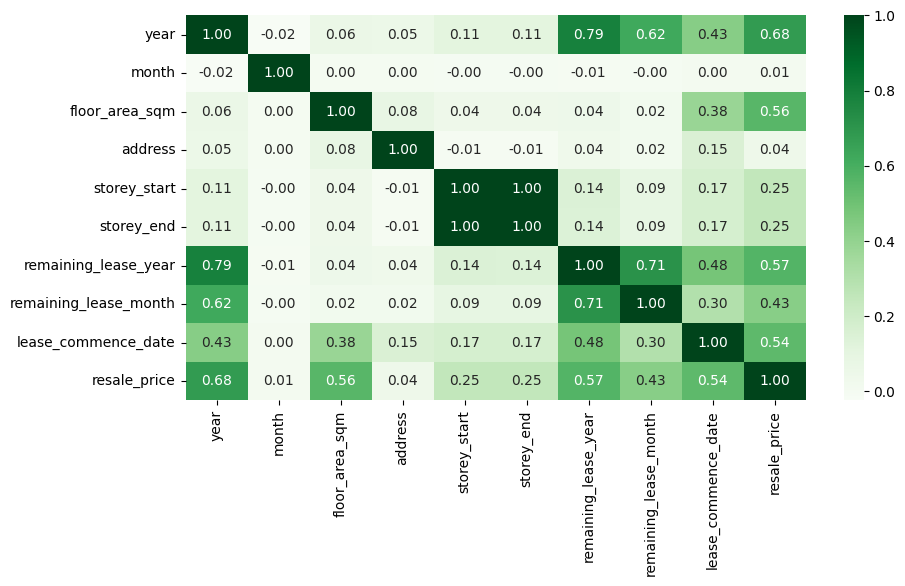

In [96]:
# Checking the Correlation using heatmap

df_12_corr= df_12.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_12_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [97]:
df_final= pd.read_csv(r"C:\Users\Shiva Periaswamy\Documents\project\guvi\guvi_project_5_singapore\ResaleFlatPrices.csv")
df_final.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,1990,1,ANG MO KIO,1 ROOM,31.0,IMPROVED,3837,10,12,0,0,1977,9000.0
1,1990,1,ANG MO KIO,1 ROOM,31.0,IMPROVED,3837,4,6,0,0,1977,6000.0


In [98]:
# checking the duplicate values
df_final.duplicated().sum()

np.int64(1899)

In [99]:
df_final_1= df_final.drop_duplicates()
df_final_1.reset_index(drop= True, inplace= True)

In [100]:
df_final_1.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
931760,2024,8,YISHUN,EXECUTIVE,146.0,Maisonette,7707,1,3,62,3,1987,770000.0
931761,2024,8,YISHUN,EXECUTIVE,145.0,Apartment,9114,1,3,62,4,1987,860888.0


In [101]:
df_final_2= df_final_1.drop(columns=["month","address"])

In [102]:
df_final_2.tail(2)

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
931760,2024,YISHUN,EXECUTIVE,146.0,Maisonette,1,3,62,3,1987,770000.0
931761,2024,YISHUN,EXECUTIVE,145.0,Apartment,1,3,62,4,1987,860888.0


In [103]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

ValueError: could not convert string to float: 'ANG MO KIO'

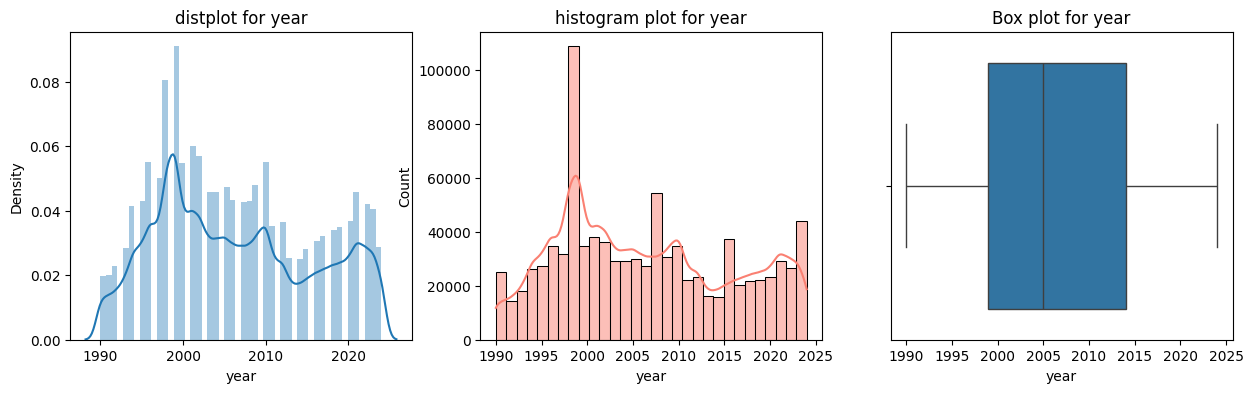

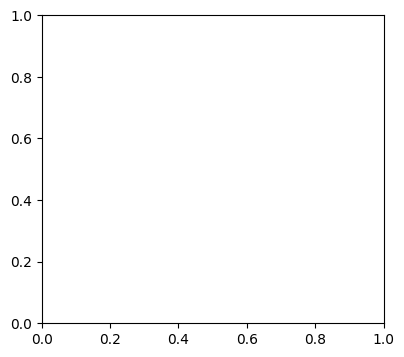

In [104]:
for i in df_final_2.columns:
    plot(df_final_2,i)

In [105]:
df_final_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,931762.0,2006.297405,9.405384,1990.0,1999.0,2005.0,2014.0,2024.0
floor_area_sqm,931762.0,95.711241,25.812410,28.0,73.0,93.0,113.0,366.7
storey_start,931762.0,6.689703,4.831524,1.0,4.0,7.0,10.0,49.0
storey_end,931762.0,8.704368,4.831504,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,931762.0,17.829028,32.352620,0.0,0.0,0.0,0.0,97.0
remaining_lease_month,931762.0,1.114154,2.711300,0.0,0.0,0.0,0.0,11.0
lease_commence_date,931762.0,1988.349337,10.730282,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,931762.0,322947.447931,172366.095561,5000.0,195000.0,300000.0,420000.0,1588000.0


In [106]:
df_final_3= df_final_2.copy()

In [107]:
df_final_3["storey_start"]= np.log(df_final_3["storey_start"])
df_final_3["storey_end"]= np.log(df_final_3["storey_end"])
df_final_3["resale_price"]= np.log(df_final_3["resale_price"])

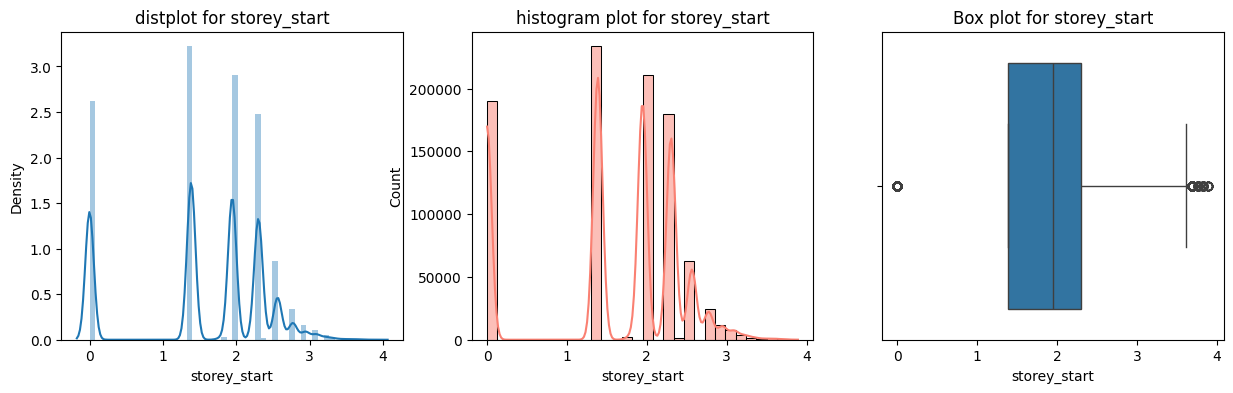

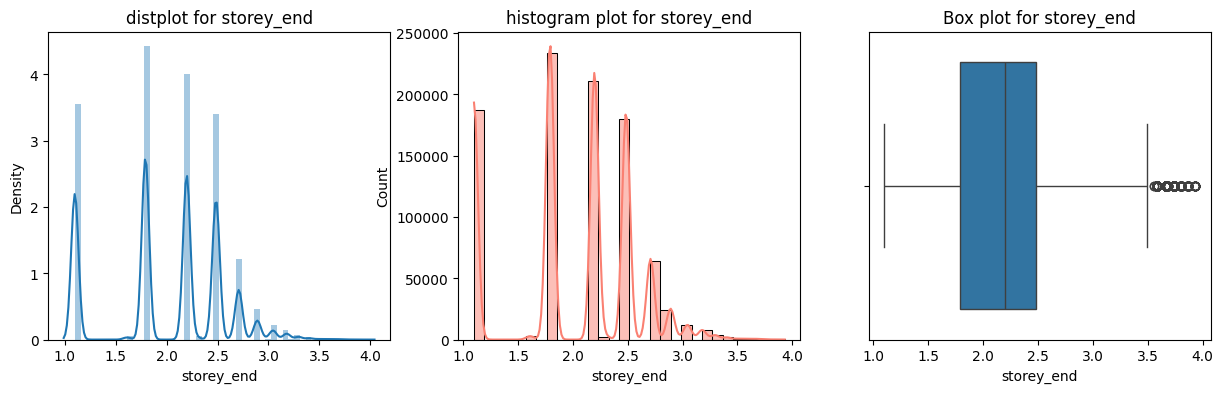

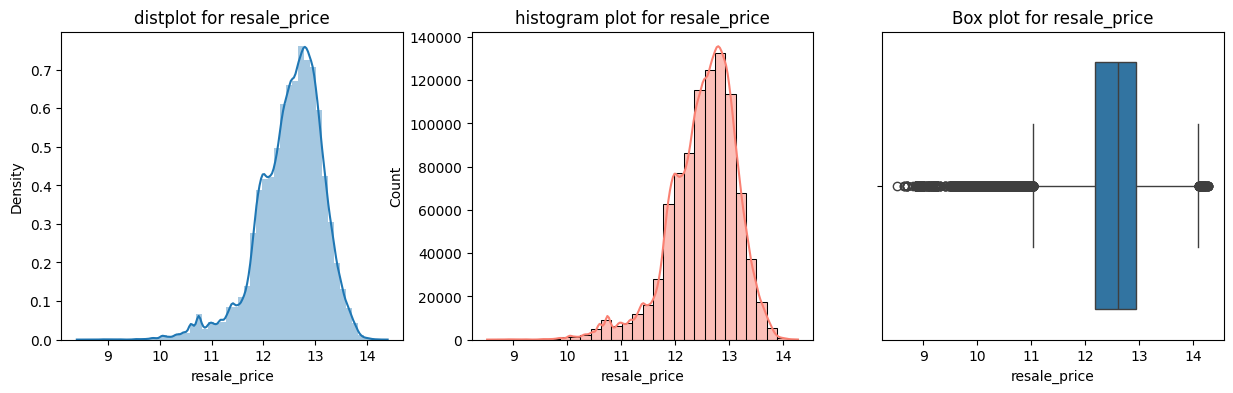

In [108]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df_final_3,i)

In [109]:
df_final_4= df_final_3.copy()

In [110]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [111]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)

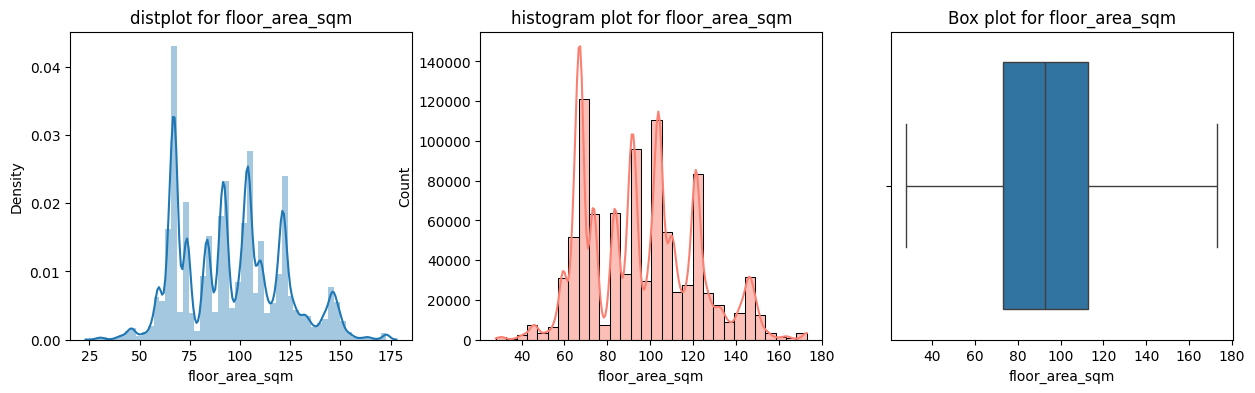

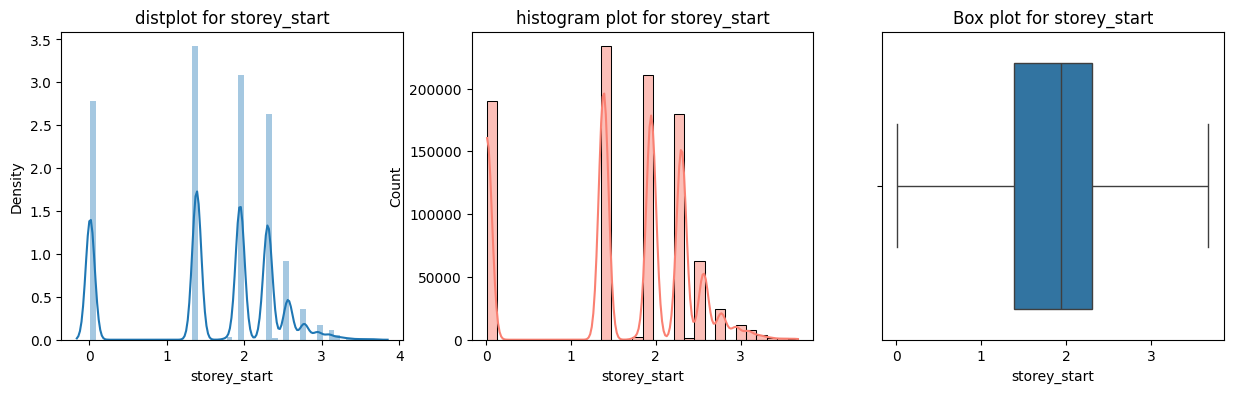

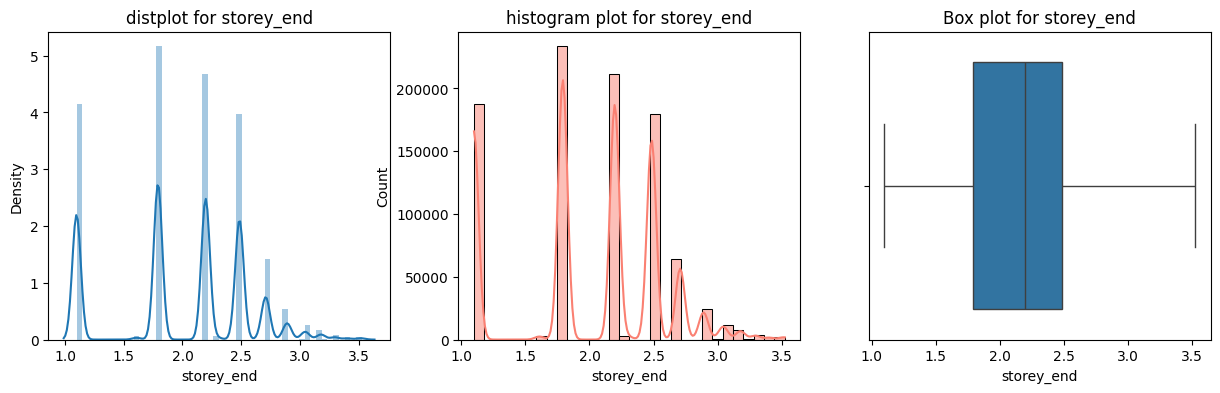

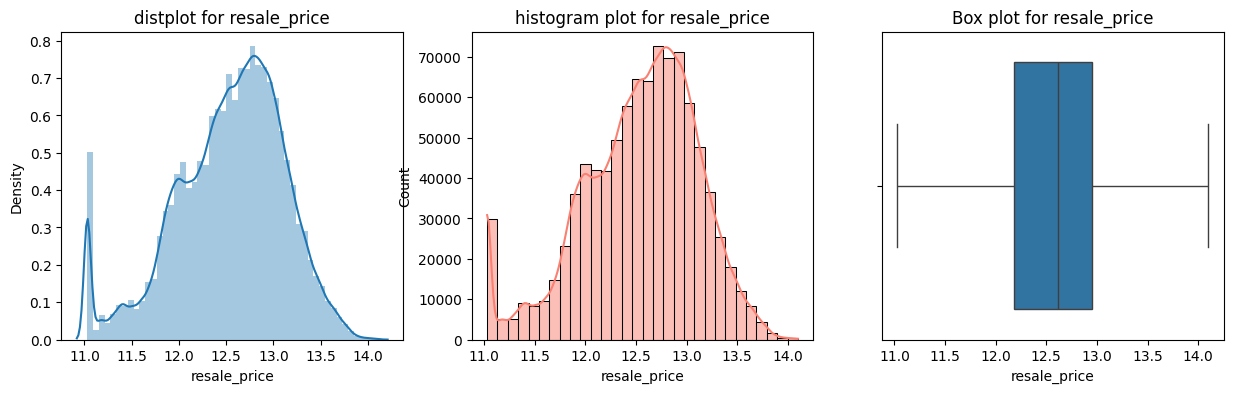

In [112]:
for k in outlier_columns:
    plot(df_final_4,k)

In [134]:
df_final_5= df_final_1.copy()

In [135]:
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,931762.0,2006.297405,9.405384,1990.0,1999.0,2005.0,2014.0,2024.0
month,931762.0,6.553580,3.402462,1.0,4.0,7.0,9.0,12.0
floor_area_sqm,931762.0,95.711241,25.812410,28.0,73.0,93.0,113.0,366.7
address,931762.0,4796.590623,2862.030467,0.0,2292.0,4752.0,7267.0,9840.0
storey_start,931762.0,6.689703,4.831524,1.0,4.0,7.0,10.0,49.0
storey_end,931762.0,8.704368,4.831504,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,931762.0,17.829028,32.352620,0.0,0.0,0.0,0.0,97.0
remaining_lease_month,931762.0,1.114154,2.711300,0.0,0.0,0.0,0.0,11.0
lease_commence_date,931762.0,1988.349337,10.730282,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,931762.0,322947.447931,172366.095561,5000.0,195000.0,300000.0,420000.0,1588000.0


In [136]:
np.exp(13.942690)

np.float64(1135620.7776035476)

In [137]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] >= 1135620]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
743930,2016,12,KALLANG/WHAMPOA,3 ROOM,259.0,Terrace,7006,1,3,54,0,1972,1150000.0
745911,2017,2,BISHAN,5 ROOM,120.0,DBSS,3323,40,42,93,7,2011,1180000.0
755355,2017,7,QUEENSTOWN,EXECUTIVE,156.0,Apartment,1269,19,21,77,3,1995,1160000.0
761858,2017,11,CENTRAL AREA,5 ROOM,107.0,Type S2,2010,43,45,92,2,2011,1138000.0
767662,2018,3,CENTRAL AREA,5 ROOM,107.0,Type S2,2007,37,39,91,10,2011,1145000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931260,2024,8,QUEENSTOWN,5 ROOM,117.0,Improved,7526,22,24,86,2,2011,1210000.0
931459,2024,8,SERANGOON,EXECUTIVE,146.0,Maisonette,4080,4,6,60,6,1986,1150000.0
931460,2024,8,SERANGOON,EXECUTIVE,150.0,Apartment,4037,7,9,60,4,1985,1230000.0
931598,2024,8,TOA PAYOH,5 ROOM,159.0,Model A-Maisonette,711,10,12,58,10,1984,1250000.0


In [138]:
np.exp(12.104561)

np.float64(180694.13157722994)

In [139]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] <= 180694]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,1990,1,ANG MO KIO,1 ROOM,31.0,IMPROVED,3837,10,12,0,0,1977,9000.0
1,1990,1,ANG MO KIO,1 ROOM,31.0,IMPROVED,3837,4,6,0,0,1977,6000.0
2,1990,1,ANG MO KIO,1 ROOM,31.0,IMPROVED,3837,10,12,0,0,1977,8000.0
3,1990,1,ANG MO KIO,1 ROOM,31.0,IMPROVED,3837,7,9,0,0,1977,6000.0
4,1990,1,ANG MO KIO,3 ROOM,73.0,NEW GENERATION,2375,4,6,0,0,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827516,2020,11,BUKIT MERAH,2 ROOM,42.0,Standard,6009,10,12,48,5,1970,180000.0
834210,2021,1,WOODLANDS,2 ROOM,45.0,Improved,2424,7,9,64,5,1986,180000.0
834760,2021,2,BUKIT MERAH,1 ROOM,31.0,Improved,8296,4,6,53,1,1975,180000.0
904612,2023,8,TAMPINES,3 ROOM,67.0,Model A,6552,7,9,91,3,2015,150000.0


In [140]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [141]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [142]:
#df_final_5.info()
#df_final_5["town"] = df_final_5["town"].astype(float)
#df_final_5["flat_type"] = df_final_5["flat_type"].astype(float)
#df_final_5["flat_model"] = df_final_5["flat_model"].astype(float)
df_final_5["town"] = pd.to_numeric(df_final_5["town"], errors='coerce')
df_final_5["flat_type"] = pd.to_numeric(df_final_5["flat_type"], errors='coerce')
df_final_5["flat_model"] = pd.to_numeric(df_final_5["flat_model"], errors='coerce')

In [145]:
#df_final_5["town"].fillna(0, inplace=True)
#df_final_5["flat_type"].fillna(0, inplace=True)
#df_final_5["flat_model"].fillna(0, inplace=True)

# Count NaN values in each column
nan_counts = df_final_5.isna().sum()
print(nan_counts)


year                     0
month                    0
town                     0
flat_type                0
floor_area_sqm           0
flat_model               0
address                  0
storey_start             0
storey_end               0
remaining_lease_year     0
remaining_lease_month    0
lease_commence_date      0
resale_price             0
dtype: int64


In [146]:
select_model(df_final_5, LinearRegression)
select_model(df_final_5, DecisionTreeRegressor)
select_model(df_final_5, RandomForestRegressor)
select_model(df_final_5, AdaBoostRegressor)
select_model(df_final_5, ExtraTreesRegressor)
select_model(df_final_5, GradientBoostingRegressor)
select_model(df_final_5, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.7597989970314243, 'Mean_squared_error': np.float64(7148368687.0468), 'Root_mean_squared_error': np.float64(84548.02592046015), 'Mean_absolute_error': np.float64(62430.36953067005)}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.7586665915199879, 'Mean_squared_error': np.float64(7121804182.433495), 'Root_mean_squared_error': np.float64(84390.78256796469), 'Mean_absolute_error': np.float64(62348.90008154956)}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9998637703579563, 'Mean_squared_error': np.float64(4054186.682812233), 'Root_mean_squared_error': np.float64(2013.5011007725407), 'Mean_absolute_error': np.float64(303.87769897817043)}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.927620362356641, 'Mean_squared_error': np.float64(2135939691.6411107), 'Root_mean_squared_error': np.float64(46216.22757907779), 'Mean_absolute_error': np.float64(26751.15184256045)}

In [147]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= df_final_5.drop(columns=["resale_price"])
y= df_final_5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9610683434873253, 'Mean_squared_error': np.float64(1148882104.33573), 'Root_mean_squared_error': np.float64(33895.163435743016), 'Mean_absolute_error': np.float64(20551.15453344845)}


In [148]:
df_final_5.iloc[10456]

year                       1990.0
month                        11.0
town                          0.0
flat_type                     0.0
floor_area_sqm               92.0
flat_model                    0.0
address                    6727.0
storey_start                  7.0
storey_end                    9.0
remaining_lease_year          0.0
remaining_lease_month         0.0
lease_commence_date        1980.0
resale_price             100000.0
Name: 10456, dtype: float64

In [149]:
np.exp(12.815838)

np.float64(367999.92008841544)

In [153]:
user_data = np.array([[2015,4,2,74,8,0.011858,1.098612,68,0,1985,0,6]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

np.float64(225550.0)

In [152]:
np.exp(12.792003979535888)

np.float64(359332.7000997733)

In [154]:
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [155]:
import pickle
import numpy as np

In [156]:
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [158]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990,0,6]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

np.float64(225933.88)

In [160]:
np.exp(12.313923357750493)

np.float64(222776.28881715712)